<a href="https://colab.research.google.com/github/gilesitorr/Estadistica_Avanzada/blob/main/Tarea_4/EA_tarea_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# __Estadística Avanzada__
# Tarea 4
## _Gil Estéfano Rodríguez Rivera_

__Nota:__ En este Notebook se usó el kernel de R, aunque la extensión sea ipynb.

__Nota:__ También puede encontrar el desarrollo en _GitHub_ en https://github.com/gilesitorr/Estadistica_Avanzada/tree/main/Tarea_4

## Biostatistics: A Foundation for Analysis in the Health Sciences
### Wayne W. Daniel & Chad L. Cross

In Exercise 8.2.1 to 8.2.7, go through the ten steps of analysis of variance hypothesis testing to see if you can conclude that there is a difference among population means. Let a=05 for each test. Use Tukey’s HSD procedure to test for significant differences among individual pairs of means (if appropriate). Use the same a value for the F test. Construct a dot plot and side-by-side boxplots of the data.

### 8.2.5


__In a study by Wang et al. (A-6), researchers examined bone strength. They collected 10 cadaveric femurs from subjects in three age groups: young (19–49 years), middle-aged (50–69 years), and elderly (70 years or older) (Note: one value was missing in the middle-aged group). One of the outcome measures (W) was the force in Newtons required to fracture the bone. The following table shows the data for the three age groups.__

_Young (Y)_: 193.6, 137.5, 122.0, 145.4, 117.0, 105.4, 99.9, 74.0, 74.4, 112.8

_Middle-Aged (MA)_: 125.4, 126.5, 115.9, 98.8, 94.3, 99.9, 83.3, 72.8, 83.5

_Elderly (E)_: 59.0, 87.2, 84.4, 78.1, 51.9, 57.1, 54.7, 78.6, 53.7, 96.0

In [1]:
# Los datos
y <- c(193.6, 137.5, 122.0, 145.4, 117.0, 105.4, 99.9, 74.0, 74.4, 112.8)
ma <- c(125.4, 126.5, 115.9, 98.8, 94.3, 99.9, 83.3, 72.8, 83.5)
e <- c(59.0, 87.2, 84.4, 78.1, 51.9, 57.1, 54.7, 78.6, 53.7, 96.0)

# Todos los datos
total <- c(y, ma, e)

# Los promedios de cada dataset
mean.y <- mean(y)
mean.ma <- mean(ma)
mean.e <- mean(e)
mean.total <- mean(total)

# Los tamaños de cada dataset
n.y <- length(y)
n.ma <- length(ma)
n.e <- length(e)
n.total <- length(total)

# El número de grupos
k <- 3

# Cálculo de los valores de la prueba
ssw <- sum((y-mean.y)**2) + sum((ma-mean.ma)**2) + sum((e-mean.e)**2)
ssa <- n.y*((mean.y-mean.total)**2) + n.ma*((mean.ma-mean.total)**2) + n.e*((mean.e-mean.total)**2)

msw <- ssw/(n.total-k)
msa <- ssa/(k-1)

# El estadístico de prueba
vr <- msa/msw

In [2]:
# El p-value de la prueba F
1-pf(vr, k-1, n.total-k)

[1] 0.0009214117

Como el p-value es menor que 0.05, se rechaza la hipótesis de que todas las medias son iguales. Por lo tanto, la media de al menos de uno de los grupos es diferente de las demás.

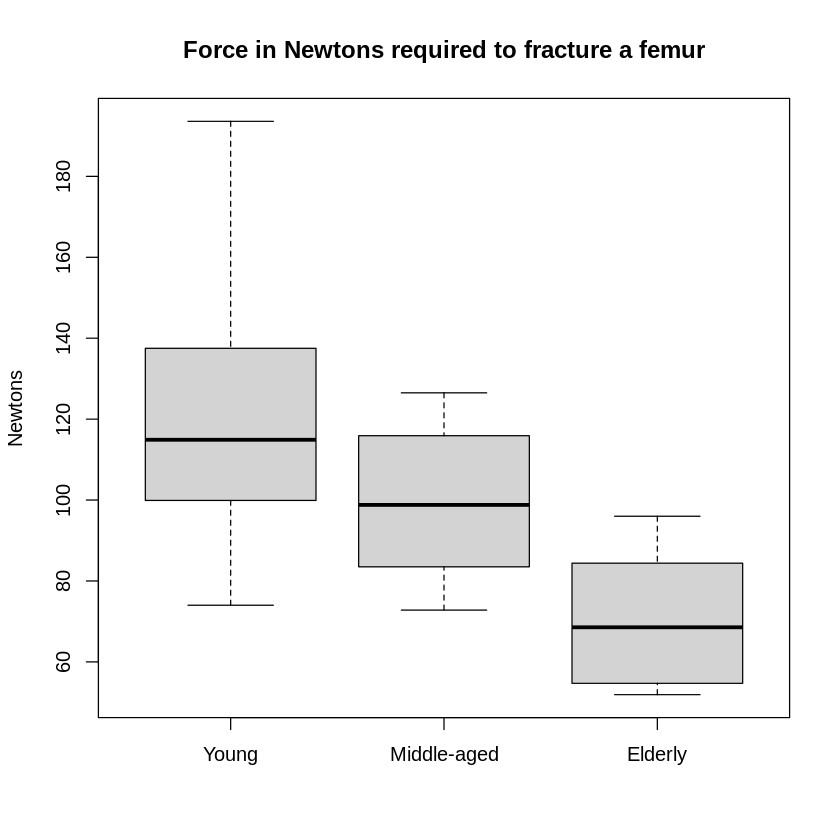

In [3]:
boxplot(y, ma, e, main="Force in Newtons required to fracture a femur", ylab="Newtons", names = c("Young", "Middle-aged", "Elderly"))

### 8.2.7


__Thrombocytopaenia is a condition of abnormally low platelets that often occurs during necrotizing enterocolitis (NEC)—a serious illness in infants that can cause tissue damage to the intestines. Ragazzi et al. (A-8) investigated differences in the log10 of platelet counts in 178 infants with NEC. Patients were grouped into four categories of NEC status. Group 0 referred to infants with no gangrene, group 1 referred to subjects in whom gangrene was limited to a single intestinal segment,
group 2 referred to patients with two or more intestinal segments of gangrene, and group 3 referred to patients with the majority of small and large bowel involved. The following table gives the log10 platelet counts for these subjects.__

_0:_ 1.97, 2.33, 2.48, 0.85, 2.60, 2.23,
     1.79, 1.88, 2.51, 2.30, 2.33, 2.38,
     1.71, 2.48, 2.31, 2.66, 2.15, 2.08,
     2.66, 2.15, 2.08, 2.49, 1.41, 2.49,
     2.37, 2.03, 2.21, 1.81, 2.59, 2.45,
     2.51, 2.23, 1.96, 2.38, 1.61, 2.29,
     2.58, 2.33, 2.23, 2.84, 2.34, 2.78,
     2.55, 1.38, 2.36, 1.90, 2.52, 1.89,
     2.28, 2.35, 2.26, 2.33, 2.63, 1.79,
     1.77, 2.03, 1.87, 1.83, 1.08, 2.51,
     1.67, 2.40, 2.29, 2.67, 1.77, 2.38,
     1.80

_1:_ 1.38, 2.45, 1.86, 2.60, 2.26, 1.83,
     1.99, 2.47, 1.32, 1.92, 2.11, 2.51,
     2.54, 1.79, 2.06, 2.17, 2.41, 2.18,
     2.23, 2.53, 2.00, 1.98, 2.74, 1.93,
     2.00, 2.42, 2.51, 0.79, 2.08, 1.38

_2:_ 1.87, 2.37, 1.90, 1.75, 2.43, 2.57,
     1.32, 1.51, 2.06, 1.08, 1.04, 2.36,
     1.99, 2.55, 2.52, 1.80, 1.93, 2.44,
     2.29, 2.81, 1.75, 2.17, 2.16, 2.72,
     1.81, 2.44, 2.46, 1.98, 1.66, 1.57,
     2.51, 2.05, 1.76, 2.30, 1.72, 1.36,
     2.57, 2.48, 2.30, 1.40, 0.70, 1.75,
     2.16, 2.67, 2.17, 2.37, 2.12, 1.46,
     2.27, 1.91

_3:_ 1.77, 1.68, 1.46, 1.53, 1.36, 1.65,
     2.12, 1.73, 1.91, 1.57, 2.27, 1.00,
     1.81, 2.27, 2.43, 1.74, 1.60, 2.08,
     2.34, 1.89, 1.75, 1.69, 2.49, 1.75,
     1.86, 1.26, 2.36

In [4]:
# Los datos

data.0 <- c(1.97, 2.33, 2.48,
            0.85, 2.60, 2.23,
            1.79, 1.88, 2.51,
            2.30, 2.33, 2.38,
            1.71, 2.48, 2.31,
            2.66, 2.15, 2.08,
            2.49, 1.41, 2.49,
            2.37, 2.03, 2.21,
            1.81, 2.59, 2.45,
            2.51, 2.23, 1.96,
            2.38, 1.61, 2.29,
            2.58, 1.86, 2.54,
            2.58, 2.33, 2.23,
            2.84, 2.34, 2.78,
            2.55, 1.38, 2.36,
            1.90, 2.52, 1.89,
            2.28, 2.35, 2.26,
            2.33, 2.63, 1.79,
            1.77, 2.03, 1.87,
            1.83, 1.08, 2.51,
            1.67, 2.40, 2.29,
            2.67, 1.77, 2.38, 1.80) 
 

data.1 <- c(1.38, 2.45, 
            1.86, 2.60, 
            2.26, 1.83, 
            1.99, 2.47, 
            1.32, 1.92, 
            2.11, 2.51, 
            2.54, 1.79, 
            2.06, 2.17, 
            2.41, 2.18, 
            2.23, 2.53, 
            2.00, 1.98, 
            2.74, 1.93, 
            2.00, 2.42, 
            2.51, 0.79, 
            2.08, 1.38)

data.2 <- c(1.87, 2.37, 
            1.90, 1.75, 
            2.43, 2.57, 
            1.32, 1.51, 
            2.06, 1.08, 
            1.04, 2.36,
            1.99, 1.58, 
            1.52, 1.83, 
            1.99, 2.55, 
            2.52, 1.80, 
            1.93, 2.44, 
            2.29, 2.81, 
            1.75, 2.17, 
            2.16, 2.72, 
            1.81, 2.44, 
            2.46, 1.98, 
            1.66, 1.57, 
            2.51, 2.05, 
            1.76, 2.30, 
            1.72, 1.36, 
            2.57, 2.48, 
            2.30, 1.40,
            0.70, 1.75,
            2.16, 2.67,
            2.17, 2.37,
            2.12, 1.46,
            2.27, 1.91)

data.3 <- c(1.77,
            1.68,
            1.46,
            1.53,
            1.36,
            1.65,
            2.12,
            1.73,
            1.91,
            1.57,
            2.27,
            1.00,
            1.81,
            2.27,
            2.43,
            1.74,
            1.60,
            2.08,
            2.34,
            1.89,
            1.75,
            1.69,
            2.49,
            1.75,
            1.86,
            1.26,
            2.36)

# Todos los datos
total <- c(data.0, data.1, data.2, data.3)

In [5]:
# Los promedios de cada dataset
mean.0 <- mean(data.0)
mean.1 <- mean(data.1)
mean.2 <- mean(data.2)
mean.3 <- mean(data.3)
mean.total <- mean(total)

# Los tamaños de cada dataset
n.0 <- length(data.0)
n.1 <- length(data.1)
n.2 <- length(data.2)
n.3 <- length(data.3)
n.total <- length(total)

# El número de grupos
k <- 4

# Cálculo de los valores de la prueba
ssw <- sum((data.0-mean.0)**2) + sum((data.1-mean.1)**2) + sum((data.2-mean.2)**2) + sum((data.3-mean.3)**2) 
ssa <- n.0*((mean.0-mean.total)**2) + n.1*((mean.1-mean.total)**2) + n.2*((mean.2-mean.total)**2) + n.3*((mean.3-mean.total)**2)

msw <- ssw/(n.total-k)
msa <- ssa/(k-1)

# El estadístico de prueba
vr <- msa/msw

In [6]:
# El p-value de la prueba F
1-pf(vr, k-1, n.total-k)

[1] 0.002554792

Como el p-value es menor que 0.05, se rechaza la hipótesis de que todas las medias son iguales. Por lo tanto, la media de al menos de uno de los grupos es diferente de las demás.

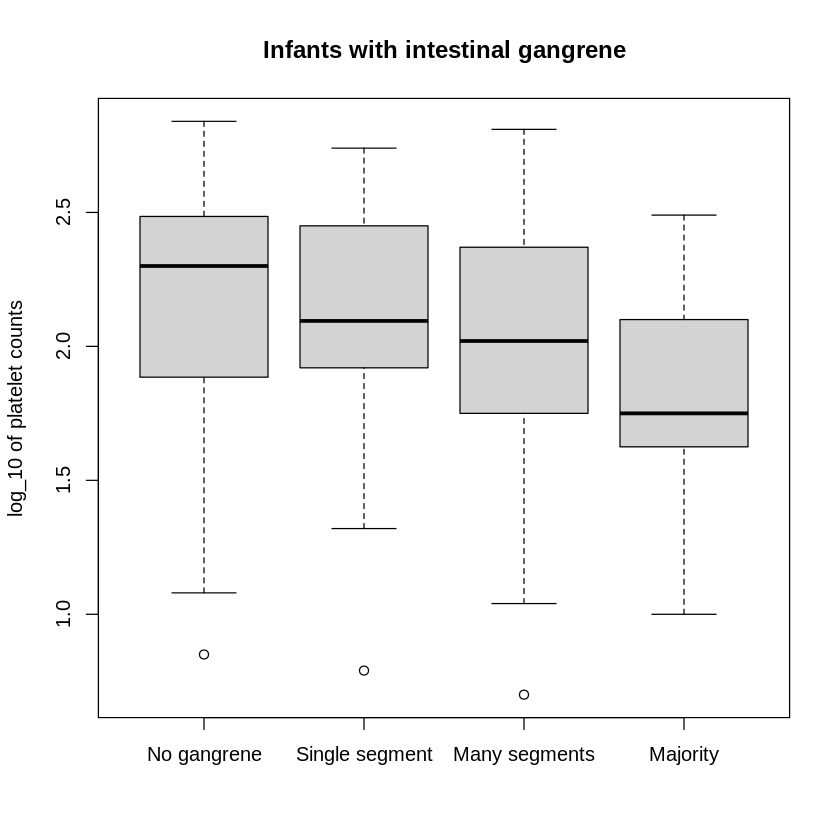

In [7]:
boxplot(data.0, data.1, data.2, data.3, main="Infants with intestinal gangrene", ylab="log_10 of platelet counts", names = c("No gangrene", "Single segment", "Many segments", "Majority"))

### 8.3.5


__Four subjects participated in an experiment to compare three methods of relieving stress. Each
subject was placed in a stressful situation on three different occasions. Each time a different method
for reducing stress was used with the subject. The response variable is the amount of decrease in stress
level as measured before and after treatment application. The results were as follows:__

_Subject 1:_ 16, 26, 22

_Subject 2:_ 16, 20, 23

_Subject 3:_ 17, 21, 22

_Subject 4:_ 28, 29, 36

__Can we conclude from these data that the three methods differ in effectiveness?__

In [8]:
# Los datos por sujeto
subject.1 <- c(16, 26, 22)
subject.2 <- c(16, 20, 23)
subject.3 <- c(17, 21, 22)
subject.4 <- c(28, 29, 36)

# Los datos por tratamiento
treatment.1 <- c(16, 16, 17, 28)
treatment.2 <- c(26, 20, 21, 29)
treatment.3 <- c(22, 23, 22, 36)

# Todos los datos
total <- c(treatment.1, treatment.2, treatment.3)
mean.total <- mean(total)

# Los promedios por tratamientp
mean.1 <- mean(treatment.1)
mean.2 <- mean(treatment.2)
mean.3 <- mean(treatment.3)

# Los promedios por sujeto
mean1. <- mean(subject.1)
mean2. <- mean(subject.2)
mean3. <- mean(subject.3)
mean4. <- mean(subject.4)

# Tamaños
n <- 4
k <- 3

# Los cálculos necesarios
sst <- sum( (treatment.1-mean.total)**2 ) + sum( (treatment.2-mean.total)**2 ) + sum( (treatment.3-mean.total)**2 )
ssbi <- k*( (mean1.-mean.total)**2 + (mean2.-mean.total)**2 + (mean3.-mean.total)**2 + (mean4.-mean.total)**2 )
sstr <- n*( (mean.1-mean.total)**2 + (mean.2-mean.total)**2 + (mean.3-mean.total)**2 )
sse <- sst-ssbi-sstr

mstr <- sstr/(k-1)
mse <- sse/((n-1)*(k-1))

In [9]:
# El estadístico de prueba
vr <- mstr/mse

# El cálculo del p-value usando la distribución F
1-pf(vr, k-1, (n-1)*(k-1))

[1] 0.02420454

Como el p-value del estadístico de prueba es menor a 0.05, se infiere que al menos un tratamiento difiere en efectividad.

### 8.3.7

__Hodgson et al. (A-14) conducted a study in which they induced gastric dilatation in six anesthetized dogs maintained with constant-dose isoflurane in oxygen. Cardiopulmonary measurements prior to stomach distension (baseline) were compared with measurements taken during .1, .5, 1.0, 1.5, 2.5, and 3.5 hours of stomach distension by analyzing the change from baseline. After distending the stomach, cardiac index increased from 1.5 to 3.5 hours. Stroke volume did not change. During inflation, increases were observed in systemic arterial, pulmonary
arterial, and right atrial pressure. Respiratory frequency was unchanged. PaO2 tended to decrease during gastric dilatation. What are the experimental units? The blocks? Treatment variable? Response variable(s)? Can you think of any extraneous variable whose effect would contribute to the error term? Construct an ANOVA table for this study in which you identify the sources of variability and specify the degrees of freedom__

La variable del tratamiento son las horas después de la distensión. La variable de respuesta es el cambio de volumen estomacal.

Una variable que puede inducir errores es la diferencia de volumen que ocurre cuando el corazón impulsa el flujo de sangre.

Una fuente de variabilidad puede ser la raza y la edad del perrom, pues afectan en su tamaño. Una manera apropiada de estudiar por igual a todos los sujetos sería normalizar las diferencias del volumen en términos del cambio de volumen usual del estómago.

```
                    Treatments
        __________________________________
Blocks |  0.1   0.5   1.0   1.5   2.5   3.5 (hours after stomach distension)
Dog 1  |
Dog 2  |
Dog 3  |
Dog 4  |
Dog 5  |
Dog 6  |

```

```
Source      SS   d.f.   MS      V.R.
______________________________________
Treatments   -    5      -    MSTr/MSE
Blocks       -    5      -
Residual     -    25     -
______________________________________
Total        -    35

```

### 8.4.3

__Holben et al. (A-19) designed a study to evaluate selenium intake in young women in the years of puberty. The researchers studied a cohort of 16 women for three consecutive summers. One of the outcome variables was the selenium intake per day. The researchers examined dietary journals of the subjects over the course of 2 weeks and then computed the average daily selenium intake. The following table shows the average daily selenium intake values in \mu g=d for the 16 women in years 1, 2, and 3 of the study.__

_Subject 1:_ 112.51, 121.28, 94.99

_Subject 2:_ 106.20, 121.14, 145.69

_Subject 3:_ 102.00, 121.14, 130.37

_Subject 4:_ 103.74, 90.21, 135.91

_Subject 5:_ 103.17, 121.14, 145.69

_Subject 6:_ 112.65, 98.11, 145.69

_Subject 7:_ 106.20, 121.14, 136.43

_Subject 8:_ 83.57, 102.87, 144.35

_Subject 9:_ 95.05, 93.89, 73.26

_Subject 10:_ 112.65, 100.47, 145.69

_Subject 11:_ 103.74, 121.14, 123.97

_Subject 12:_ 103.74, 121.14, 135.91

_Subject 13:_ 112.67, 104.66, 136.87

_Subject 14:_ 106.20, 121.14, 126.42

_Subject 15:_ 103.74, 121.14, 136.43

_Subject 16:_ 106.20, 100.47, 135.91

In [10]:
# Los sujetos
subject.1 <- c(112.51, 121.28, 94.99)
subject.2 <- c(106.20, 121.14, 145.69)
subject.3 <- c(102.00, 121.14, 130.37)
subject.4 <- c(103.74, 90.21, 135.91)
subject.5 <- c(103.17, 121.14, 145.69)
subject.6 <- c(112.65, 98.11, 145.69)
subject.7 <- c(106.20, 121.14, 136.43)
subject.8 <- c(83.57, 102.87, 144.35)
subject.9 <- c(95.05, 93.89, 73.26)
subject.10 <- c(112.65, 100.47, 145.69)
subject.11 <- c(103.74, 121.14, 123.97)
subject.12 <- c(103.74, 121.14, 135.91)
subject.13 <- c(112.67, 104.66, 136.87)
subject.14 <- c(106.20, 121.14, 126.42)
subject.15 <- c(103.74, 121.14, 136.43)
subject.16 <- c(106.20, 100.47, 135.91)

total <- rbind(subject.1, subject.2, subject.3, subject.4,
               subject.5, subject.6, subject.7, subject.8,
               subject.9, subject.10, subject.11, subject.12,
               subject.13, subject.14, subject.15, subject.16)

# Los tratamientos
year.1 <- c()
year.2 <- c()
year.3 <- c()
for (i in 1:16){
  year.1 <- c(year.1, total[i, 1])
  year.2 <- c(year.2, total[i, 2])
  year.3 <- c(year.3, total[i, 3])
}

In [11]:
# Los promedios del total
mean.total <- mean(total)

# Los promedios por tratamiento
mean.1 <- mean(year.1)
mean.2 <- mean(year.2)
mean.3 <- mean(year.3)

# Los promedios por sujeto
mean.subject <- c(mean(subject.1))
for (i in 1:16){
  mean.subject <- c(mean.subject, mean(total[i,]))
}

# Tamaños
n <- 16
k <- 3

# Los cálculos necesarios
sst <- sum( (year.1-mean.total)**2 ) + sum( (year.2-mean.total)**2 ) + sum( (year.3-mean.total)**2 )
ssbi <- 0
for (i in 1:16){
  ssbi <- ssbi + (mean.subject[i]-mean.total)**2
}
ssbi <- k*ssbi
sstr <- n*( (mean.1-mean.total)**2 + (mean.2-mean.total)**2 + (mean.3-mean.total)**2 )
sse <- sst-ssbi-sstr

mstr <- sstr/(k-1)
mse <- sse/((n-1)*(k-1))

In [12]:
# El estadístico de prueba
vr <- mstr/mse

# El cálculo del p-value usando la distribución F
1-pf(vr, k-1, (n-1)*(k-1))

[1] 1.291641e-05

Como el p-value del estadístico de prueba es menor a 0.05, se infiere que al menos un año hubo una diferencia de consumo.

### 8.4.5

__Werther et al. (A-21) examined the vascular endothelial growth factor (VEGF) concentration in blood from colon cancer patients. Research suggests that inhibiting VEGF may disrupt tumor growth. The researchers measured VEGF concentration (ng/L) for 10 subjects and found an upward trend in VEGF concentrations during the clotting time measured at baseline, and hours 1 and 2. What is the response variable? What is the treatment variable? Construct an ANOVA table for this study in which you identify the sources of variability and specify the degrees of freedom for each.__

La variable de respuesta es la concentración de VEGF. La variable del tratamiento es las horas que transcurrieron desde el tiempo de _clotting_.

```
                       Treatments
            __________________________________
Blocks     |       1                 2         (hours in clotting time)
Subject 1  |
Subject 2  |
   ...     |
Subject 10 |

```

```
Source      SS   d.f.   MS      V.R.
______________________________________
Treatments   -    1      -    MSTr/MSE
Blocks       -    9      -
Residual     -    9      -
______________________________________
Total        -    19

```

### 8.5.3

__Main et al. (A-24) state, “Primary headache is a very common condition and one that nurses encounter in many different care settings. Yet, there is a lack of evidence as to whether advice
given to sufferers is effective and what improvements may be expected in the conditions.” The researchers assessed frequency of headaches at the beginning and end of the study for 19 subjects in an intervention group (treatment 1) and 25 subjects in a control group (treatment 2).
Subjects in the intervention group received health education from a nurse, while the control group did not receive education. In the 6 months between pre- and post-evaluation, the subjects kept a headache diary. The following table gives as the response variable the difference (pre – post) in frequency of headaches over the 6 months for two factors: (1) treatment with two levels (intervention and control), and (2) migraine status with two levels (migraine sufferer and nonmigraine sufferer).__

__Can one conclude on the basis of these data that there is a difference in the reduction of headache frequency between the control and treatment groups? Can one conclude that there is a difference in the reduction of headache frequency between migraine and non-migraine sufferers? Can one conclude that there is interaction between treatments and migraine status?__

In [13]:
# Los datos
data <- rbind(c(-2, 1, 1),
              c(-3, 2, 2),
              c(2, 2, 1),
              c(-6, 2, 2),
              c(33, 1, 1),
              c(11, 1, 2),
              c(-6, 2, 1),
              c(64, 1, 2),
              c(6, 2, 1),
              c(65, 1, 2),
              c(98, 1, 1),
              c(14, 1, 2),
              c(2, 2, 1),
              c(8, 1, 2),
              c(6, 2, 1),
              c(6, 2, 2),
              c(33, 1, 1),
              c(14, 1, 2),
              c(-7, 2, 1),
              c(-11, 2, 2),
              c(-1, 2, 1),
              c(53, 1, 2),
              c(-12, 2, 1),
              c(26, 2, 2),
              c(12, 1, 1),
              c(3, 1, 2),
              c(64, 1, 1),
              c(15, 1, 2),
              c(36, 2, 1),
              c(3, 1, 2),
              c(6, 2, 1),
              c(41, 1, 2),
              c(4, 2, 1),
              c(16, 1, 2),
              c(11, 2, 1),
              c(-4, 2, 2),
              c(0, 2, 1),
              c(-6, 2, 2),
              c(9, 1, 2),
              c(9, 2, 2),
              c(-3, 2, 2),
              c(9, 2, 2),
              c(3, 1, 2),
              c(4, 2, 2))

# Se convierte la matriz de datos en un dataframe
df <- as.data.frame(data)
# Se nombran las columnas
colnames(df) <- c("cambio", "migraña", "tratamiento")

In [14]:
# Se hace el two-way anova y se muestra la tabla anova
summary( aov(cambio ~ migraña*tratamiento, data = df) )

                    Df Sum Sq Mean Sq F value   Pr(>F)    
migraña              1   6827    6827  17.090 0.000177 ***
tratamiento          1    647     647   1.619 0.210523    
migraña:tratamiento  1    567     567   1.420 0.240430    
Residuals           40  15980     399                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Vistos los p-values, sólo el p-value de la migraña es menor que 0.05. Entonces, que el paciente tenga migraña o no es el único factor relevante en el cambio del dolor.

### 8.5.5

__A study by Gorecka et al. (A-26) assessed the manner in which among middle-aged smokers the diagnosis of airflow limitation (AL) combined with advice to stop smoking influences the smoking cessation rate. Their concerns were whether having AL, whether the subject successfully quit smoking, and whether interaction between AL and smoking status were significant factors in regard to baseline variables and lung capacity variables at the end of the study. Some of the variables of interest were previous years of smoking (pack years), age at which subject first began smoking, forced expiratory volume in one second FEV1, and forced vital capacity (FVC). There were 368 subjects in the study. What are the factors in this study? At how many levels does each occur? Who are the subjects? What is (are) the response variable(s)? Can you think of any extraneous variables whose effects are included in the error term?__

Los factores del estudio son si el sujeto tiene limitaciones ventilatorias y si dejó de fumar. En ambos factores se tienen dos niveles: sí o no.

Los sujetos de la muestra son fumadores de mediana edad.

Las variables de respuesta tienen que ver con la capacidad pulmonar y algunas condiciones de salud.

Algunas variables que pueden inducir error son la cantidad de cajetillas que fumaba al año: no es lo mismo un fumador que consume 52 cajetillas al año que uno que consume 250 en el mismo período. O si los años de tabaquismo más intenso son recientes o si lleva tiempo tratando dejar de fumar.